In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
from datetime import date
import random


import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv.gz', infer_datetime_format=True)


<ipython-input-4-073cd9fdca74>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv.gz', infer_datetime_format=True)


In [6]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
data['date_time'] =  pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')
data = data.set_index(pd.DatetimeIndex(data['date_time']))
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.7+ MB


In [9]:
data.index.min(), data.index.max()

(Timestamp('2012-10-02 09:00:00'), Timestamp('2018-09-30 23:00:00'))

In [10]:
ts = data['2016-09-30':'2018-09-29']

In [11]:
ts.isnull().sum()

holiday                21166
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [12]:
ts.describe(include='object')

,holiday,weather_main,weather_description
count,27,21193,21193
unique,11,10,34
top,Martin Luther King Jr Day,Clear,sky is clear
freq,5,6222,5801


In [15]:
ts['weekday'] = ts['date_time'].dt.day_name()
ts['hour'] = ts['date_time'].dt.hour
ts['month'] = ts['date_time'].dt.month
ts['year'] = ts['date_time'].dt.year

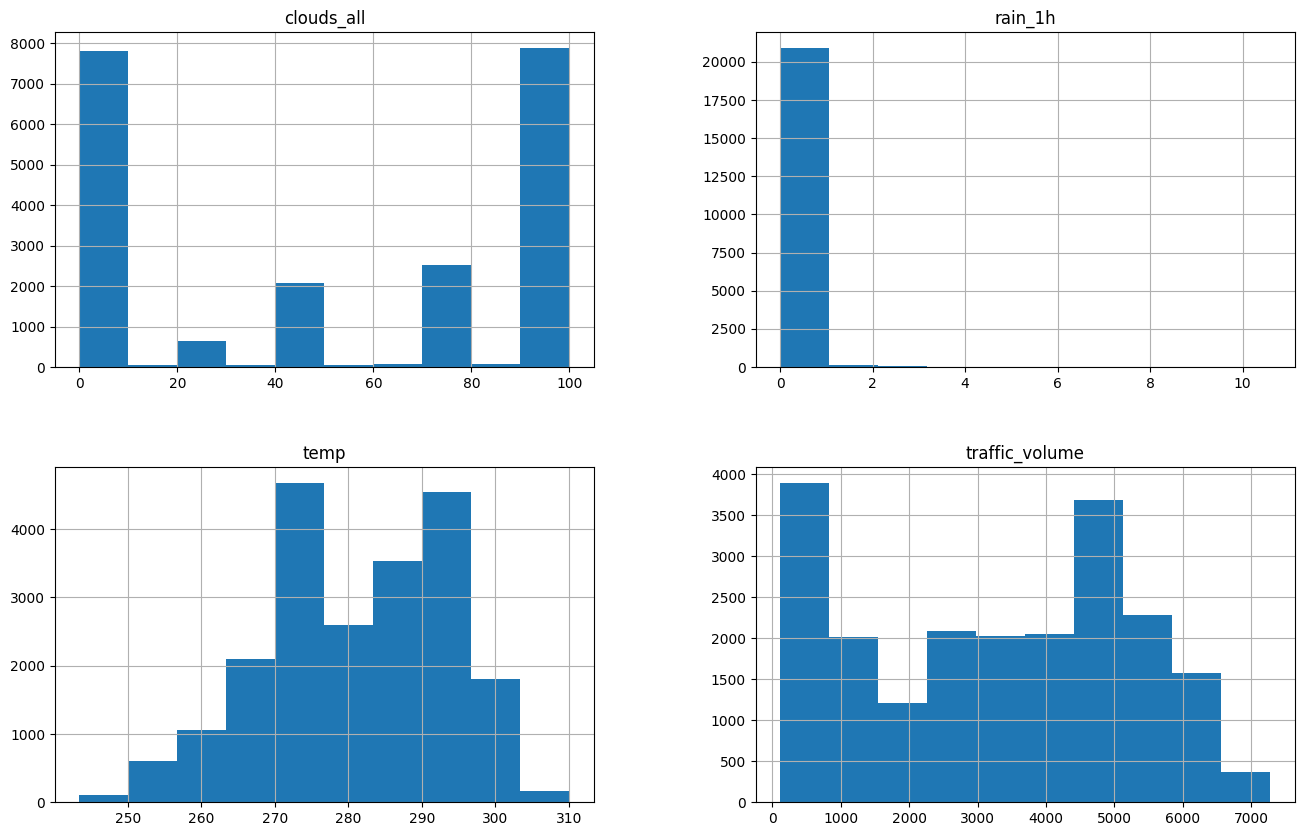

In [16]:
import plotly.graph_objects as go

layout = go.Layout(title='Traffic volume', xaxis=dict(title='Date'))
fig = go.Figure([go.Scatter(x=ts['date_time'], y=ts['traffic_volume'])], layout=layout)
fig.show()


ts[['clouds_all','rain_1h','temp','traffic_volume']].hist(figsize=(16,10))
plt.show()

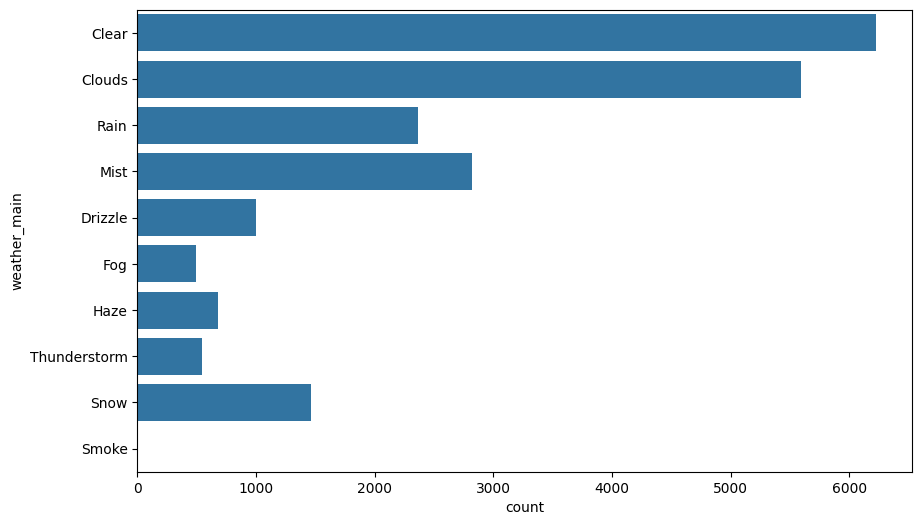

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(y='weather_main', data = ts)
plt.show()

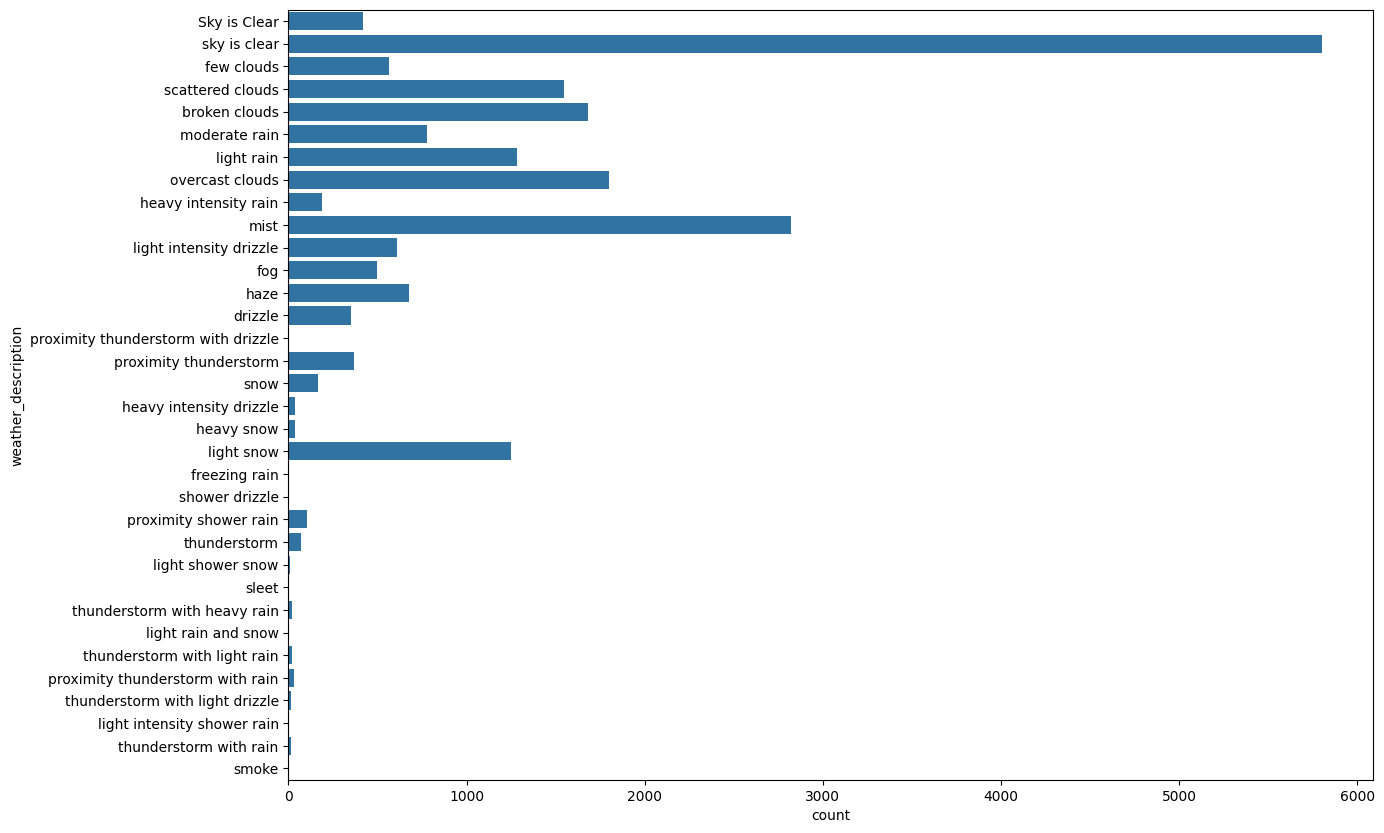

In [18]:
plt.figure(figsize = (14,10))
sns.countplot(y='weather_description', data = ts)
plt.show()


In [19]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
                x=ts.date_time,
                y=ts['traffic_volume'],
                name="traffic volume",
                line_color='deepskyblue',
                opacity=0.8),
                secondary_y=False)

fig.add_trace(go.Scatter(
                x=ts.date_time,
                y=ts['temp'],
                name="temp",
                line_color='dimgray',
                opacity=0.8),
                secondary_y=True)

# Set x-axis title
fig.update_xaxes(title_text="Datetime")

# Set y-axes titles
fig.update_yaxes(title_text="traffic volume", secondary_y=False)
fig.update_yaxes(title_text="temperature", secondary_y=True)
fig.show()

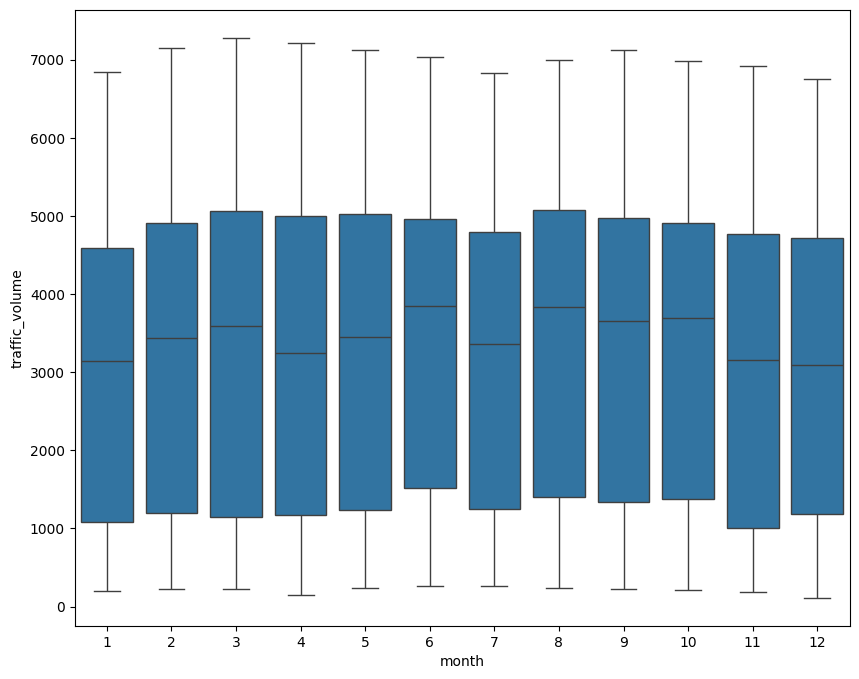

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='month', data = ts)
plt.show()

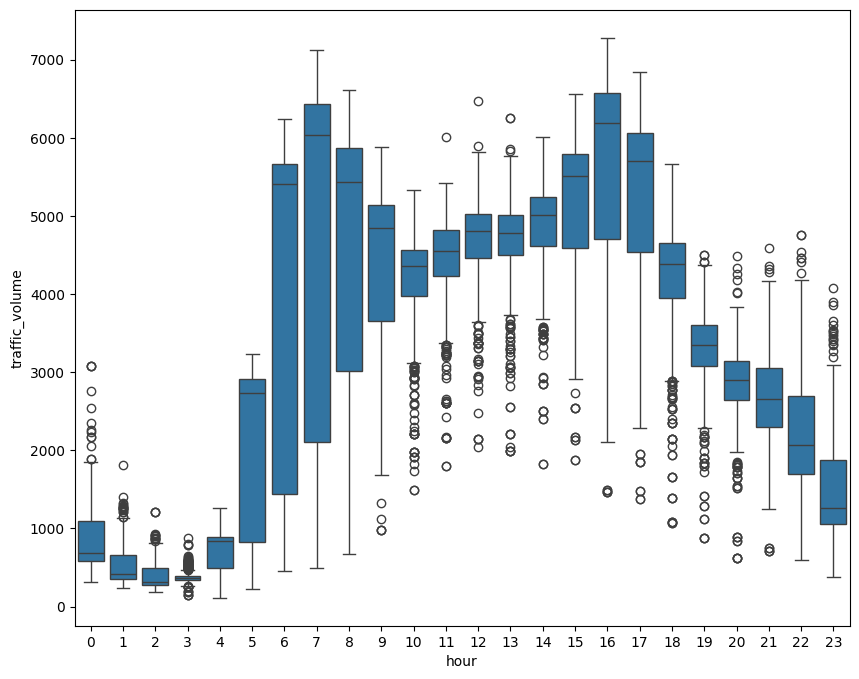

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='hour', data = ts)
plt.show()


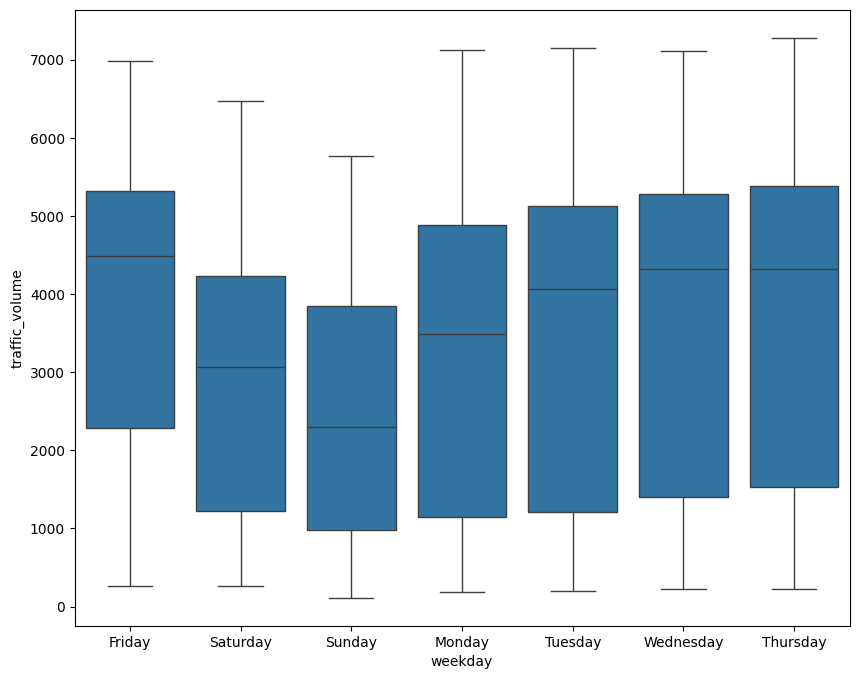

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='weekday', data = ts)
plt.show()

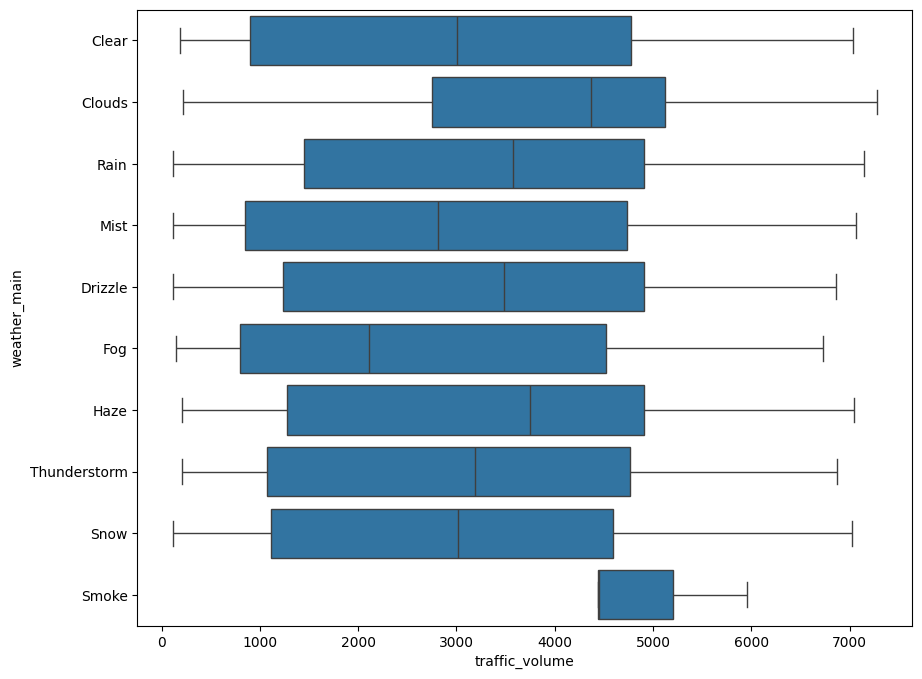

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(y='weather_main',x='traffic_volume', data = ts)
plt.show()

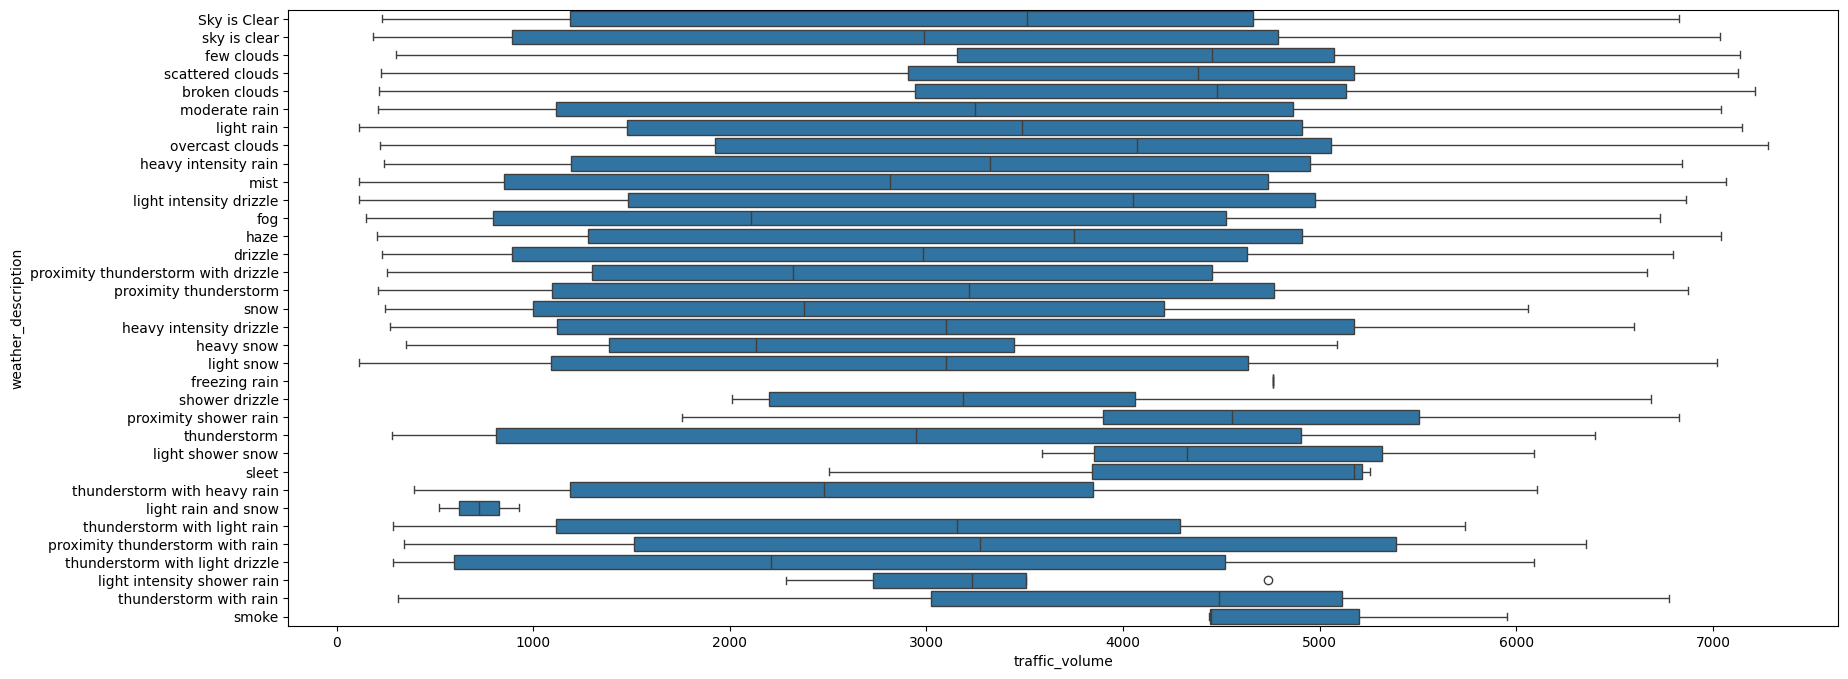

In [25]:
plt.figure(figsize=(20,8))
sns.boxplot(x='traffic_volume', y='weather_description', data = ts)
plt.show()

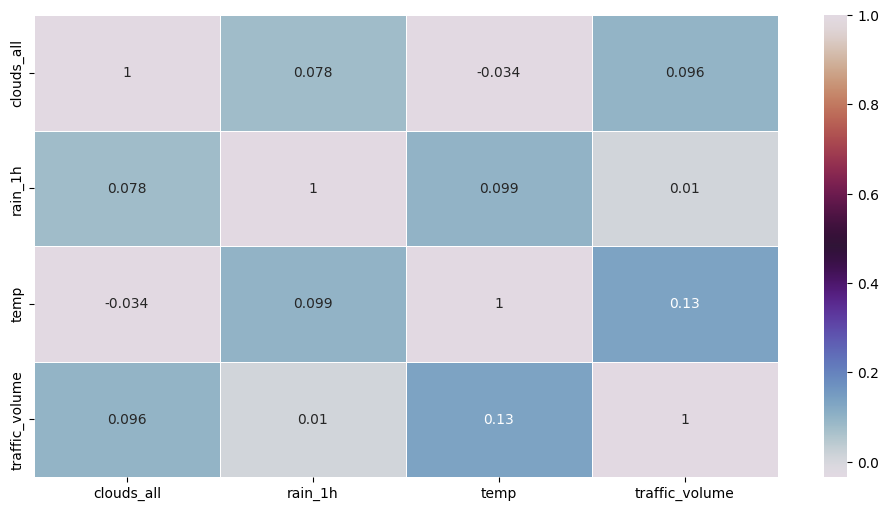

In [26]:
cm = ts[['clouds_all','rain_1h','temp','traffic_volume']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap='twilight')
plt.show()


there is no strong correlation between traffic volume and other things